In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools

In [209]:
D = pd.read_hdf('//FS2.smpp.local\RTO\CIS-PD MUSC\decoded_forms\\form509.h5')

In [210]:
sum(D.Q03=='Left')/len(D)

0.6700507614213198

## Tremor Scores

In [211]:
taskList = np.array(['Standing', 'Walking', 'Walking while counting', 'Finger to nose--right hand', 
                     'Finger to nose--left hand', 'Alternating right hand movements', 
                     'Alternating left hand movements', 'Sit to stand', 'Drawing on a paper', 
                     'Typing on a computer keyboard', 'Assembling nuts and bolts', 
                     'Taking a glass of water and drinking', 'Organizing sheets in a folder', 'Folding towels', 
                     'Sitting'])
taskList_Abb = np.array(['Stndg', 'Wlkg', 'WlkgCnt', 'FtnR', 'FtnL', 'RamR', 'RamL', 'SitStand', 
                         'Drwg', 'Typg', 'NtsBts', 'Drnkg', 'Sheets', 'Fldg', 'Sitng'])

In [212]:
Questions = pd.read_sas('//FS2.smpp.local\RTO\CIS-PD MUSC\datadictionary.sas7bdat')
Questions = Questions[Questions.zFormID == 509.0]
Questions = Questions.drop(columns = list(set(Questions.columns)-set(['zFieldNm','zFieldNb'])))
Questions.zFieldNm = Questions.zFieldNm.apply(
    lambda x: x.replace(b'\x92',b"'").replace(b'\x97',b'--').decode() if isinstance(x, bytes) else x)
Questions.zFieldNb = Questions.zFieldNb.apply(
    lambda x: x.replace(b'\x92',b"'").replace(b'\x97',b'--').decode() if isinstance(x, bytes) else x)
## Correct Typos
Questions.loc[Questions.zFieldNm=='Walking  tremor left upper limb rating','zFieldNm'] = 'Walking tremor left upper limb rating'
Questions.loc[Questions.zFieldNb=='Q70','zFieldNm'] = 'Alternating left hand movements tremor right upper limb rating'
Questions.loc[Questions.zFieldNb=='Q145','zFieldNm'] = 'Sitting tremor right upper limb rating'

In [213]:
AllScores = pd.DataFrame()
for ind in D.index:
    row = D.loc[ind,:]
    side = row.Q03
    if side == 'left':
        SideDict = {'FtnR': 'FtnC', 'FtnL': 'FtnI', 'RamR':'RamC', 'RamL':'RamI'}
    else:
        SideDict = {'FtnR': 'FtnI', 'FtnL': 'FtnC', 'RamR':'RamI', 'RamL':'RamC'}
        
    try:
        side = side.lower()
    except(AttributeError):
        print(row.SubjectCode, row.VisitNm, row.Q03)
        continue
    RowScores = pd.DataFrame(columns=taskList_Abb, index=[ind])
    for task, task_abr in zip(taskList,taskList_Abb):
        QInd = Questions.zFieldNm==task+' tremor '+side+' upper limb rating'
        QNum = Questions[QInd].zFieldNb
#         print(task+' tremor '+side+' upper limb rating',row[QNum].values)
        if task_abr in SideDict.keys():
            task_abr=SideDict[task_abr]
        RowScores[task_abr] = row[QNum].values[0]
    RowScores.index = [(row.SubjectCode,row.VisitNm)]
    AllScores = pd.concat((AllScores,RowScores))
    

1005.0 2 Weeks: Time 120 nan
1005.0 1 Month nan
1020.0 2 Weeks: Time 0 nan
1020.0 2 Weeks: Time 30 nan
1020.0 2 Weeks: Time 60 nan
1020.0 2 Weeks: Time 90 nan
1020.0 2 Weeks: Time 120 nan
1020.0 2 Weeks: Time 150 nan
1047.0 1 Month nan
1048.0 2 Weeks: Time 150 nan


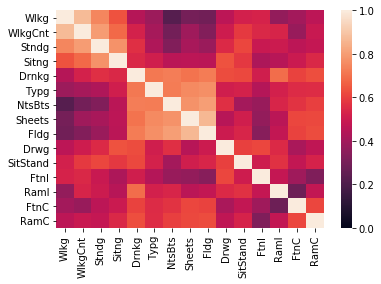

In [214]:
sns.heatmap(AllScores.corr().loc[['Wlkg','WlkgCnt','Stndg','Sitng','Drnkg','Typg','NtsBts','Sheets','Fldg','Drwg','SitStand','FtnI','RamI','FtnC','RamC'],
                                 ['Wlkg','WlkgCnt','Stndg','Sitng','Drnkg','Typg','NtsBts','Sheets','Fldg','Drwg','SitStand','FtnI','RamI','FtnC','RamC']]
           ,vmin=0, vmax=1)

In [215]:
AllScoresRMSE = pd.DataFrame(columns=AllScores.columns, index =AllScores.columns)
for x,y in itertools.product(AllScores.columns,AllScores.columns):
    AllScoresRMSE.loc[x,y] = ((AllScores[x]-AllScores[y])**2).mean()**.5

In [216]:
AllScoresRMSE = AllScoresRMSE[AllScoresRMSE.columns].astype(float)

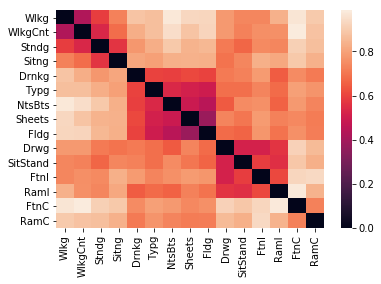

In [217]:
sns.heatmap(AllScoresRMSE.loc[['Wlkg','WlkgCnt','Stndg','Sitng','Drnkg','Typg','NtsBts','Sheets','Fldg','Drwg','SitStand','FtnI','RamI','FtnC','RamC'],
                              ['Wlkg','WlkgCnt','Stndg','Sitng','Drnkg','Typg','NtsBts','Sheets','Fldg','Drwg','SitStand','FtnI','RamI','FtnC','RamC']]
           ,vmin=0)

In [218]:
Tremor = AllScores
Tremor.drop(columns=['RamR','RamL','FtnR','FtnL'], inplace=True)
Tremor.columns = [c+'_T' for c in Tremor.columns]

## Bradykinesia Scores

In [219]:
taskList = np.array(['Walking', 'Walking while counting', 'Finger to nose--right hand', 
                     'Finger to nose--left hand', 'Alternating right hand movements', 
                     'Alternating left hand movements', 'Drawing on a paper', 
                     'Typing on a computer keyboard', 'Assembling nuts and bolts', 
                     'Taking a glass of water and drinking', 'Organizing sheets in a folder', 'Folding towels'])
taskList_Abb = np.array(['Wlkg', 'WlkgCnt', 'FtnR', 'FtnL', 'RamR', 'RamL', 
                         'Drwg', 'Typg', 'NtsBts', 'Drnkg', 'Sheets', 'Fldg'])

In [220]:
Questions = pd.read_sas('//FS2.smpp.local\RTO\CIS-PD MUSC\datadictionary.sas7bdat')
Questions = Questions[Questions.zFormID == 509.0]
Questions = Questions.drop(columns = list(set(Questions.columns)-set(['zFieldNm','zFieldNb'])))
Questions.zFieldNm = Questions.zFieldNm.apply(
    lambda x: x.replace(b'\x92',b"'").replace(b'\x97',b'--').decode() if isinstance(x, bytes) else x)
Questions.zFieldNb = Questions.zFieldNb.apply(
    lambda x: x.replace(b'\x92',b"'").replace(b'\x97',b'--').decode() if isinstance(x, bytes) else x)

In [221]:
AllScores = pd.DataFrame()
for ind in D.index:
    row = D.loc[ind,:]
    side = row.Q03
    if side == 'Left':
        SideDict = {'FtnR': 'FtnC', 'FtnL': 'FtnI', 'RamR':'RamC', 'RamL':'RamI'}
    else:
        SideDict = {'FtnR': 'FtnI', 'FtnL': 'FtnC', 'RamR':'RamI', 'RamL':'RamC'}
        
    try:
        side = side.lower()
    except(AttributeError):
        print(row.SubjectCode, row.VisitNm, row.Q03)
        continue
    RowScores = pd.DataFrame(columns=taskList_Abb, index=[ind])
    for task, task_abr in zip(taskList,taskList_Abb):
        if (task_abr[-1].lower()!=side[0])&((task_abr[-1]=='R')|(task_abr[-1]=='L')):
            continue
        QInd = Questions.zFieldNm==task+' bradykinesia '+side+' upper limb'
        if sum(QInd)<1:
            QInd = Questions.zFieldNm==task+' bradykinesia '+side+' upper limb rating'
        QNum = Questions[QInd].zFieldNb
#         print(task+' tremor '+side+' upper limb rating',row[QNum].values)
        if task_abr in SideDict.keys():
            task_abr=SideDict[task_abr]
        RowScores[task_abr] = row[QNum].values[0]
    RowScores.index = [(row.SubjectCode,row.VisitNm)]
    AllScores = pd.concat((AllScores,RowScores))
    

1005.0 2 Weeks: Time 120 nan
1005.0 1 Month nan
1020.0 2 Weeks: Time 0 nan
1020.0 2 Weeks: Time 30 nan
1020.0 2 Weeks: Time 60 nan
1020.0 2 Weeks: Time 90 nan
1020.0 2 Weeks: Time 120 nan
1020.0 2 Weeks: Time 150 nan
1047.0 1 Month nan
1048.0 2 Weeks: Time 150 nan


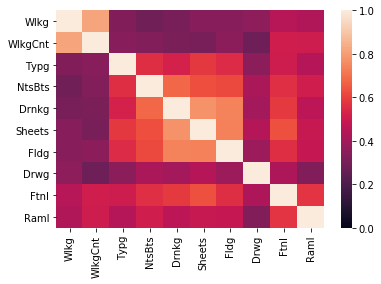

In [222]:
sns.heatmap(AllScores.corr().loc[['Wlkg','WlkgCnt','Typg','NtsBts','Drnkg','Sheets','Fldg','Drwg','FtnI','RamI'],
                                 ['Wlkg','WlkgCnt','Typg','NtsBts','Drnkg','Sheets','Fldg','Drwg','FtnI','RamI']],vmin=0, vmax=1)

In [223]:
AllScoresRMSE = pd.DataFrame(columns=AllScores.columns, index =AllScores.columns)
for x,y in itertools.product(AllScores.columns,AllScores.columns):
    AllScoresRMSE.loc[x,y] = ((AllScores[x]-AllScores[y])**2).mean()**.5

In [224]:
AllScoresRMSE = AllScoresRMSE[AllScoresRMSE.columns].astype(float)

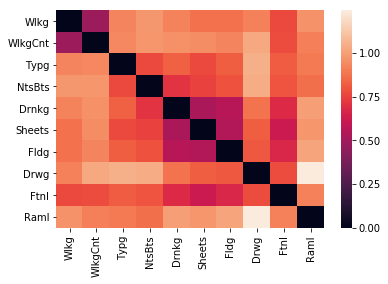

In [225]:
sns.heatmap(AllScoresRMSE.loc[['Wlkg','WlkgCnt','Typg','NtsBts','Drnkg','Sheets','Fldg','Drwg','FtnI','RamI'],
                              ['Wlkg','WlkgCnt','Typg','NtsBts','Drnkg','Sheets','Fldg','Drwg','FtnI','RamI']],vmin=0)

In [226]:
Brady = AllScores
Brady.drop(columns=['RamR','RamL','FtnR','FtnL'], inplace=True)
Brady.columns = [c+'_B' for c in Brady.columns]

## Corrleate with MDS-UPDRS

In [227]:
AllScores = pd.concat((Tremor,Brady),axis=1)

#### Extract MDS-UPDRS Scores

In [231]:
form508 = pd.read_hdf('//FS2.smpp.local\\RTO\\CIS-PD MUSC\\decoded_forms\\form508.h5')

In [236]:
form508

,SubjectCode,SiteID,VisitNm,FormDate,Q33,Q34,Q35,Q36,Q37,Q38,...,Q64,Q65,Q02,Q01,Q66,Q67,Q68,DataCollected,Qb2_UTC,FormTime
0,1003.0,1313.0,2 Weeks: Time 0,2017-07-03,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,1.0,NaN,Off,No,NaN,Severe disability; still able to walk or stand...,Yes,2017-07-03 15:20:44,10:20:44
1,1003.0,1313.0,2 Weeks: Time 60,2017-07-03,1.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,NaN,On,No,NaN,Bilateral involvement without impairment of ba...,Yes,2017-07-03 17:11:39,12:11:39
2,1004.0,1332.0,2 Weeks: Time 0,2017-07-07,1.0,1.0,0.0,1.0,2.0,1.0,...,0.0,0.0,NaN,Off,No,NaN,Bilateral involvement without impairment of ba...,Yes,2017-07-07 13:30:00,08:30:00
3,1004.0,1332.0,2 Weeks: Time 60,2017-07-07,NaN,NaN,0.0,1.0,1.0,1.0,...,0.0,0.0,NaN,On,Yes,No,Bilateral involvement without impairment of ba...,Yes,2017-07-07 15:00:00,10:00:00
4,1005.0,1313.0,2 Weeks: Time 0,2017-07-03,1.0,1.0,1.0,1.0,2.0,1.0,...,0.0,1.0,NaN,Off,No,NaN,Bilateral involvement without impairment of ba...,Yes,2017-07-03 13:34:58,08:34:58
5,1005.0,1313.0,2 Weeks: Time 60,2017-07-03,1.0,1.0,2.0,0.0,3.0,0.0,...,0.0,1.0,NaN,On,No,NaN,Bilateral involvement without impairment of ba...,Yes,2017-07-03 15:59:31,10:59:31
6,1007.0,1313.0,2 Weeks: Time 0,2017-07-07,0.0,0.0,2.0,1.0,1.0,1.0,...,0.0,2.0,NaN,Off,No,NaN,Bilateral involvement without impairment of ba...,Yes,2017-07-07 14:04:00,09:04:00
7,1007.0,1313.0,2 Weeks: Time 60,2017-07-07,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,NaN,On,No,NaN,Bilateral involvement without impairment of ba...,Yes,2017-07-07 15:37:20,10:37:20
8,1009.0,1313.0,2 Weeks: Time 0,2017-07-10,1.0,2.0,3.0,3.0,2.0,3.0,...,0.0,4.0,NaN,Off,No,NaN,Bilateral involvement without impairment of ba...,Yes,2017-07-10 14:27:58,09:27:58
9,1009.0,1313.0,2 Weeks: Time 60,2017-07-10,1.0,1.0,2.0,2.0,2.0,1.0,...,0.0,1.0,NaN,On,No,NaN,Bilateral involvement without impairment of ba...,Yes,2017-07-10 15:08:42,10:08:42


In [237]:
form508[['SubjectCode', 'VisitNm', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45',
         'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55',
         'Q56', 'Q57', 'Q58', 'Q59', 'Q60', 'Q61', 'Q62', 'Q63', 'Q64', 'Q65']]

,SubjectCode,VisitNm,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,...,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,Q64,Q65
0,1003.0,2 Weeks: Time 0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0
1,1003.0,2 Weeks: Time 60,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,...,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1004.0,2 Weeks: Time 0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1004.0,2 Weeks: Time 60,NaN,NaN,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1005.0,2 Weeks: Time 0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5,1005.0,2 Weeks: Time 60,1.0,1.0,2.0,0.0,3.0,0.0,2.0,1.0,...,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0
6,1007.0,2 Weeks: Time 0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,2.0,...,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,2.0
7,1007.0,2 Weeks: Time 60,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,1009.0,2 Weeks: Time 0,1.0,2.0,3.0,3.0,2.0,3.0,2.0,3.0,...,2.0,0.0,1.0,1.0,3.0,2.0,3.0,0.0,0.0,4.0
9,1009.0,2 Weeks: Time 60,1.0,1.0,2.0,2.0,2.0,1.0,0.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


## Ipsilateral vs. Contralateral Scores

In [7]:
BilatScores = pd.DataFrame()

In [21]:
BilatScores = pd.DataFrame()
for ind in D.index:
    row = D.loc[ind,:]
    side = row.Q03
    try:
        side = side.lower()
        otherside = (set(['left','right'])-set([side]))
        otherside = [x for x in otherside][0]
    except(AttributeError):
        print(row.SubjectCode, row.VisitNm, row.Q03)
        continue
    for task, task_abr in zip(taskList,taskList_Abb):
        newind = len(BilatScores.index)
        RowScores = pd.DataFrame(columns=['ipsi', 'contra'], index=[ind])
        QInd = Questions.zFieldNm==task+' tremor '+side+' upper limb rating'
        QNum = Questions[QInd].zFieldNb
        RowScores['ipsi'] = row[QNum].values[0]
        QInd = Questions.zFieldNm==task+' tremor '+otherside+' upper limb rating'
        QNum = Questions[QInd].zFieldNb
        RowScores['contra'] = row[QNum].values[0]
        
        BilatScores = pd.concat((BilatScores,RowScores))

1005.0 2 Weeks: Time 120 nan
1005.0 1 Month nan
1020.0 2 Weeks: Time 0 nan
1020.0 2 Weeks: Time 30 nan
1020.0 2 Weeks: Time 60 nan
1020.0 2 Weeks: Time 90 nan
1020.0 2 Weeks: Time 120 nan
1020.0 2 Weeks: Time 150 nan
1047.0 1 Month nan
1048.0 2 Weeks: Time 150 nan


In [10]:
BilatScores.corr()

,left,right
left,1.000000,0.342239
right,0.342239,1.000000


In [22]:
BilatScores.corr()

,ipsi,contra
ipsi,1.000000,0.407596
contra,0.407596,1.000000


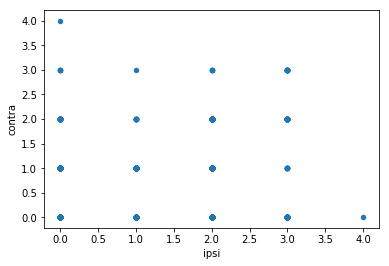

In [25]:
BilatScores.plot(x='ipsi',y='contra',kind = 'scatter')

In [53]:
BilatScoreCounts = pd.DataFrame(columns=[0, 1, 2, 3, 4], index = [0, 1, 2, 3, 4])
for x,y in itertools.product([0,1,2,3,4],[0,1,2,3,4]):
    BilatScoreCounts.loc[x,y] = sum((BilatScores.ipsi==x)&(BilatScores.contra==y))/sum(BilatScores.ipsi==x)

In [54]:
BilatScoreCounts = BilatScoreCounts[BilatScoreCounts.columns].astype(float)

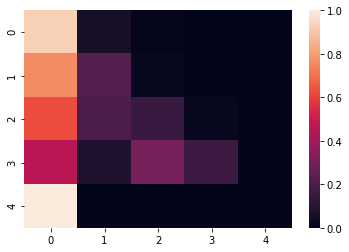

In [55]:
sns.heatmap(BilatScoreCounts)